In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

    

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# the categories  of flowers we want to classify

In [2]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

# initializing the working directory

In [3]:
# dire='/kaggle/input/flowers-recognition/flowers'
dire='d:\\Java\\datasets\\Jano\\kvety'

# Loading Data**: This is the first and most important step to begin with the process**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
features=[]
for i in categories:
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

# Preprocessing: separating the features and lables form the data

In [5]:
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

# visualizations: lets have a look on our dataset

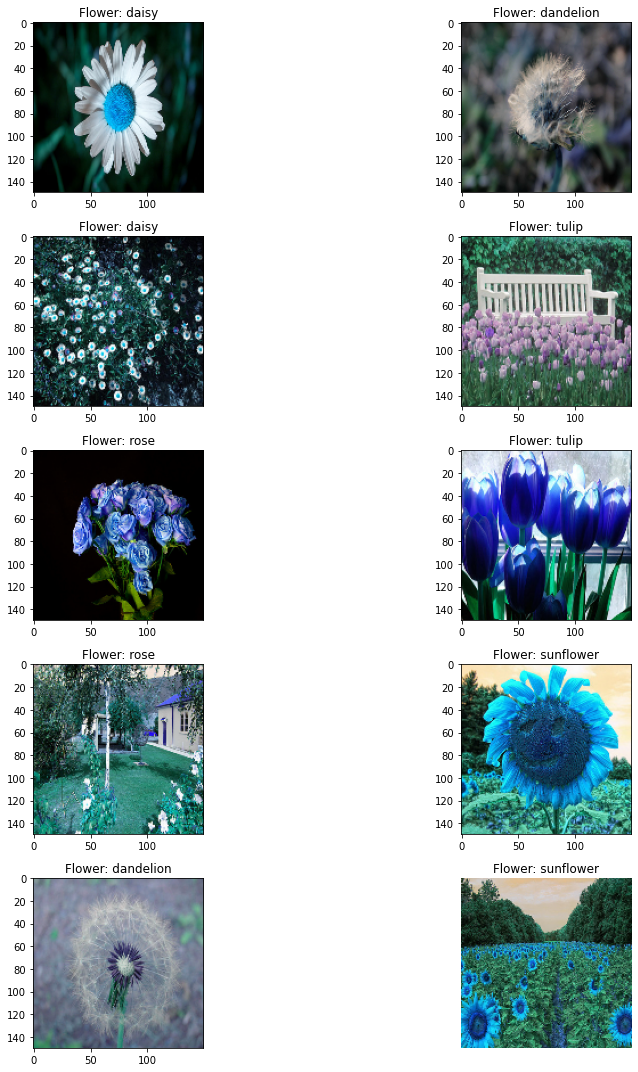

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+categories[y[l]])
plt.axis('off')        
plt.tight_layout()

# Reshaping and normalizing: the need of resizing the feature vetcor x is to meet the keras requirement and normalization is done to scale all the values in a similar range

In [7]:
X=np.array(X).reshape(-1,150,150,3)/255.0


#  lets see how our class lables are distributed

d:\NN\Miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


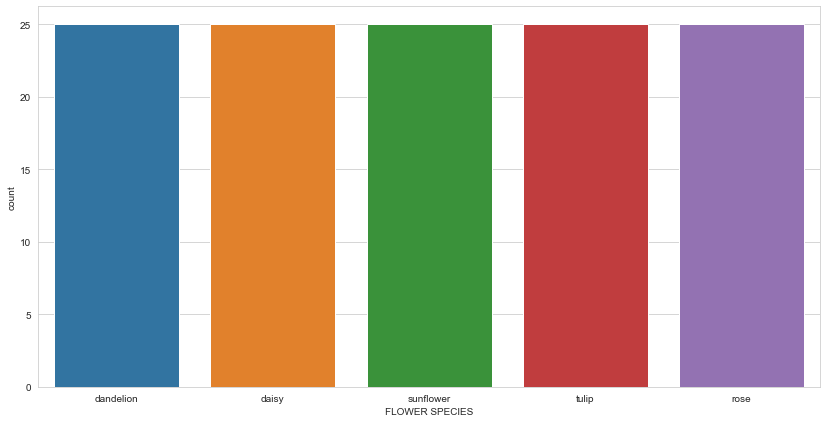

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xlabel('FLOWER SPECIES')
plt.show()


In [9]:
list_dandelion=len([i for i in y if i==0])
list_daisy=len([i for i in y if i==1])
list_sunflower=len([i for i in y if i==2])
list_tulip=len([ i for i in y if i==3])
list_rose=len([i for i in y if i==4])

In [10]:
list_species=[list_dandelion,list_daisy,list_sunflower,list_tulip,list_rose]


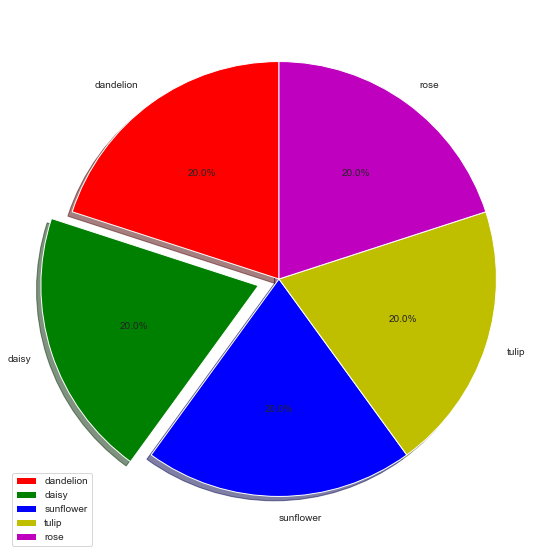

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
plt.pie(list_species,labels=categories,startangle=90,colors=['r','g','b','y','m'],autopct='%1.1f%%',explode = (0, 0.1, 0, 0,0),shadow=True)
plt.legend()
plt.show()

> # OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding

In [12]:
import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
#y=to_categorical(y)
y = tf.keras.utils.to_categorical(y)


# Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

# Model building

In [15]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))


In [17]:
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


> # Data Augmentation:It is the technique used to overome the problem of overfitting and make our model to generalize well on the unseen data.For more info [Click Here](https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9)

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [19]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)       

In [21]:
#History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                    #          epochs = epochs, validation_data = (x_test,y_test),
                        #      verbose = 1, steps_per_epoch=x_train.shape[0] // 128)
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=8),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
13/13 [==============================] - 6s 464ms/step - loss: 2.1108 - accuracy: 0.2200 - val_loss: 1.6130 - val_accuracy: 0.1200
Epoch 2/50
13/13 [==============================] - 6s 468ms/step - loss: 1.5510 - accuracy: 0.2300 - val_loss: 1.6479 - val_accuracy: 0.1600
Epoch 3/50
13/13 [==============================] - 6s 473ms/step - loss: 1.5418 - accuracy: 0.2500 - val_loss: 1.5761 - val_accuracy: 0.1200
Epoch 4/50
13/13 [==============================] - 6s 438ms/step - loss: 1.5279 - accuracy: 0.3300 - val_loss: 1.5625 - val_accuracy: 0.2800
Epoch 5/50
13/13 [==============================] - 6s 454ms/step - loss: 1.3950 - accuracy: 0.4500 - val_loss: 1.7021 - val_accuracy: 0.2000
Epoch 6/50
13/13 [==============================] - 6s 478ms/step - loss: 1.4801 - accuracy: 0.3600 - val_loss: 1.4635 - val_accuracy: 0.2800
Epoch 7/50
13/13 [==============================] - 6s 476ms/step - loss: 1.3879 - accuracy: 0.4000 - val_loss: 1.5364 - val_accuracy: 0.2400
Epoch 

# lets visualize our model functioning

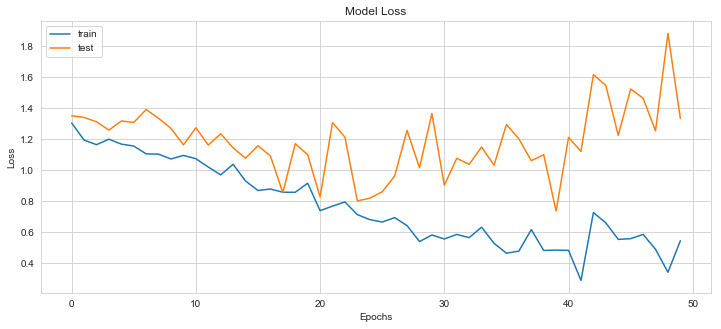

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

KeyError: 'accuracy'

<Figure size 864x360 with 0 Axes>

# Its time for prediction 

In [37]:
x_test

array([[[[0.99607843, 0.82745098, 0.85882353],
         [1.        , 0.83921569, 0.8627451 ],
         [0.99607843, 0.83137255, 0.85490196],
         ...,
         [0.85490196, 0.38823529, 0.5254902 ],
         [0.85882353, 0.39215686, 0.52941176],
         [0.84705882, 0.4       , 0.52941176]],

        [[1.        , 0.83921569, 0.86666667],
         [0.99607843, 0.83921569, 0.85882353],
         [0.99215686, 0.83529412, 0.85490196],
         ...,
         [0.85490196, 0.39215686, 0.52941176],
         [0.85098039, 0.39215686, 0.5254902 ],
         [0.83921569, 0.39607843, 0.5254902 ]],

        [[0.98823529, 0.82745098, 0.83921569],
         [0.99607843, 0.82745098, 0.82352941],
         [0.99215686, 0.81960784, 0.81176471],
         ...,
         [0.85882353, 0.4       , 0.5372549 ],
         [0.85098039, 0.39607843, 0.52941176],
         [0.84313725, 0.39607843, 0.5254902 ]],

        ...,

        [[0.65490196, 0.22352941, 0.36470588],
         [0.65882353, 0.23137255, 0.36078431]

In [29]:
preds=model.predict(x_test)

In [30]:
predictions=np.argmax(preds,axis=1)

In [64]:
predictions
y_test[2]

array([0., 1., 0., 0., 0.])

In [31]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==8):
        break
    


In [32]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break
        
        

# Analysing the predicitons

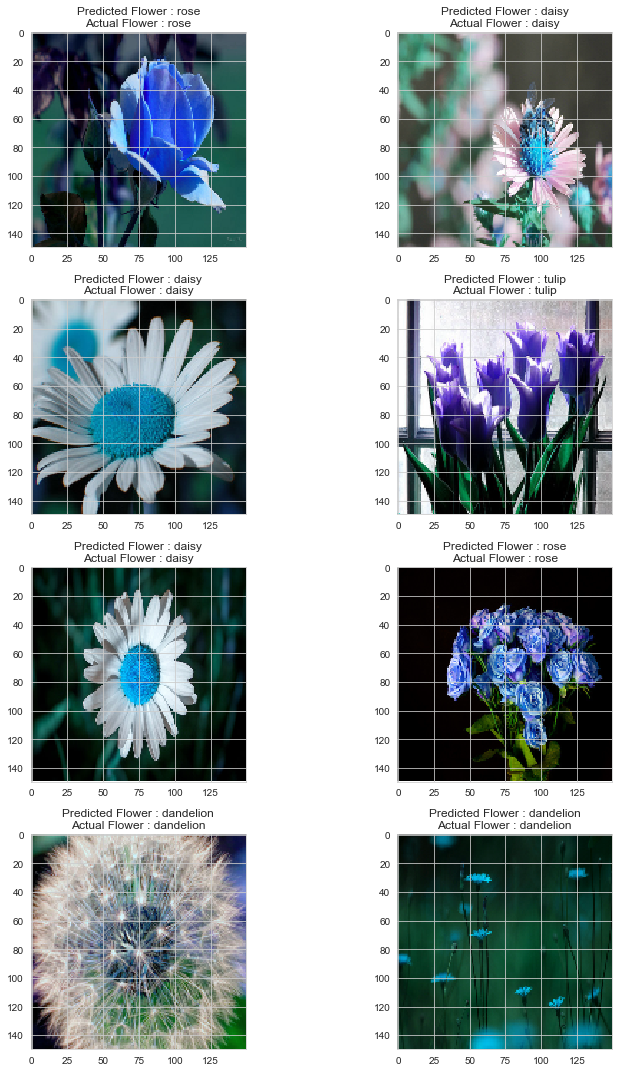

In [33]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Flower : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1

IndexError: list index out of range

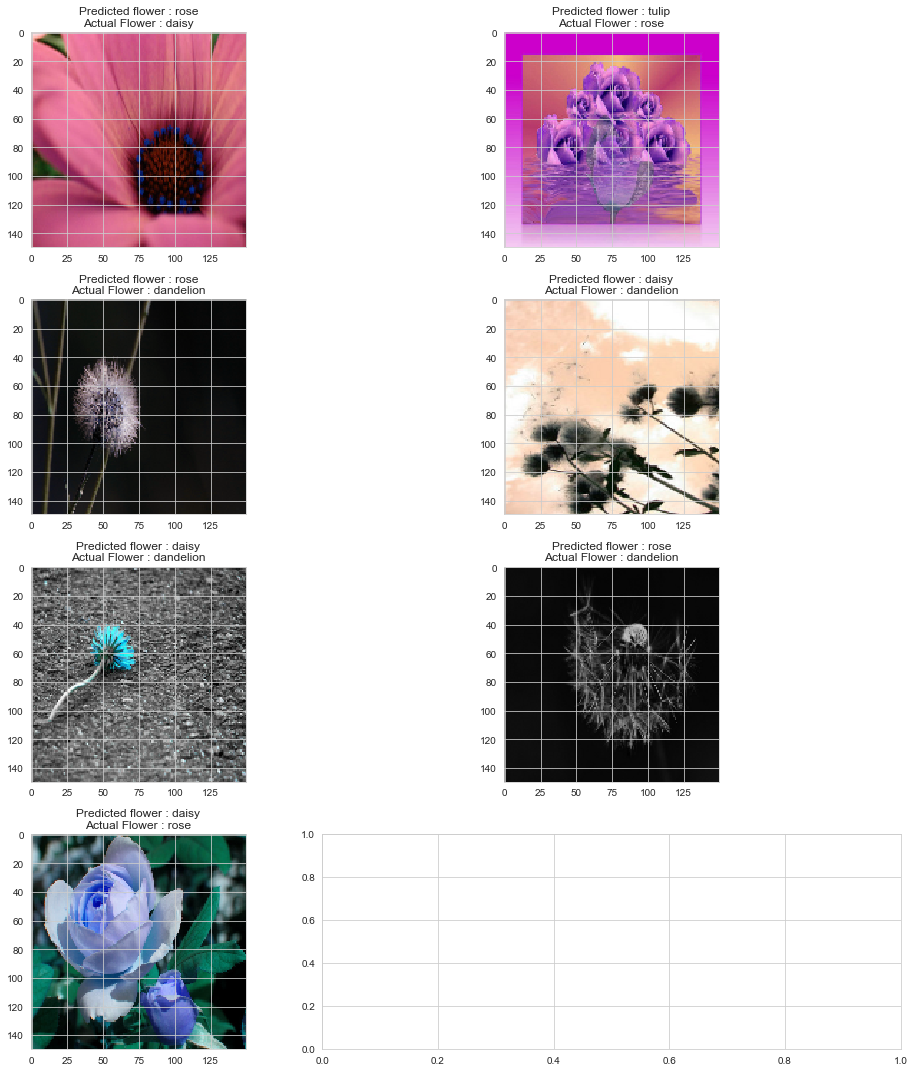

In [34]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted flower : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual Flower : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1

# Experiment and Fun

> Well this is for experiment and have fun with the model you have built.You can load images from the internet and predict using the code written below

> The image we want to predict is also needed to be preprocessed according to the requirements of the model.You need to take care of resizing  like we did below to resize it in (150,150) dimensions

In [ ]:
features = []
for i in categories:
    path = os.path.join(dire, i)
    num_classes = categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, (150, 150))
            features.append([img_array, num_classes])


X1=[]
y1=[]
for i,j in features:
    X.append(i)
    y.append(j)



X1=np.array(X1).reshape(-1,150,150,3)/255.0
y=to_categorical(y1)

X1.size    
    
    


In [57]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    #response=requests.get(url)
    img=Image.open('d:\\Java\\Datasets\\flowers\\tulip\\12616825773_9aa4245b57_n.jpg')
                    
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(150,150))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    
    print(img.shape)
    return img


    

In [58]:
def predict(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(categories[final_1])
    return categories[final_1]

(258, 320, 3)
(150, 150, 3)
(1, 150, 150, 3)


'rose'

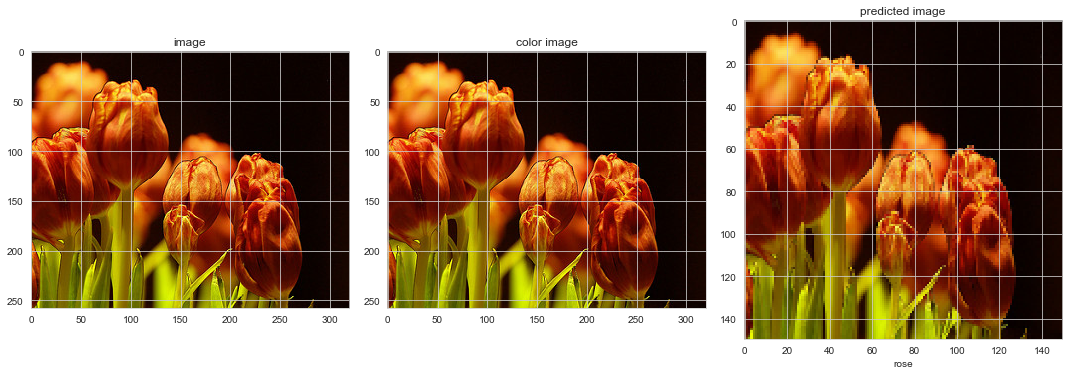

In [61]:
predict("https://media4.picsearch.com/is?LwsQDsAhRnF2IV-PP61f1fCUcQWD2jYoz6X55V_6-dg&height=266") 

(341, 255, 3)
(150, 150, 3)
(1, 150, 150, 3)


'dandelion'

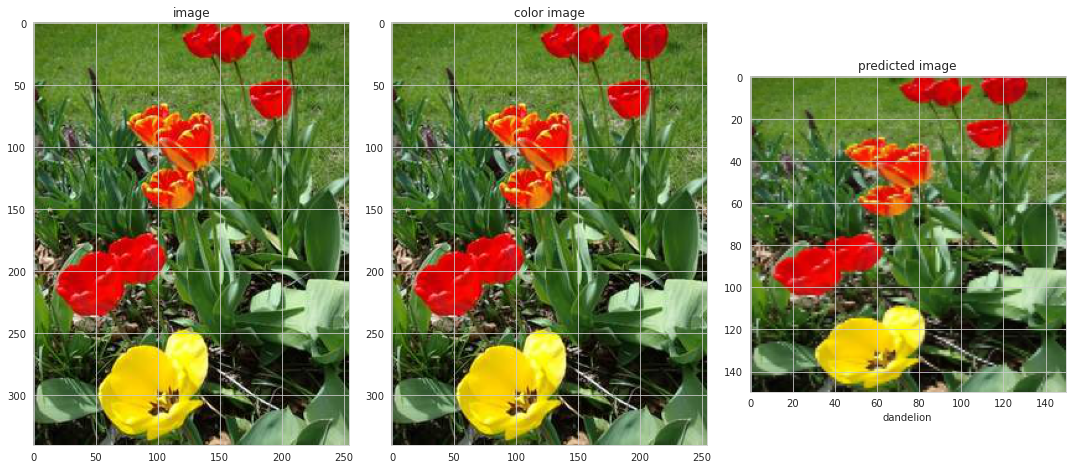

In [32]:
predict("https://media5.picsearch.com/is?8agnR1fAz2qzGkGmQsnFEb0nXkmuh-7hb-Il2rLLd7U&height=341")

>Thats all kagglers.Please upvote my notebook if you found it informative and helpful.
> If you want to give any suggestions  and queries regarding notebbok please feel free to mention it in comments